# Tests

Be sure to make a copy of this file so that you don't overwrite the template for running tests.

The tests are located in `AIQC/aiqc/tests`

`fold_count` triggers other binary cases like `ingest:bool`

---

Use the location where you cloned the repo:

In [1]:
cd '~/Desktop/AIQC'

/Users/layne/Desktop/AIQC


In [2]:
from aiqc import orm, datum, tests

---

Makes sure local tests are running, not an installed pypi module

In [3]:
orm.destroy_db(confirm=True, rebuild=True)


└── 🗑️ Success - deleted database file at path:
/Users/layne/Library/Application Support/aiqc/aiqc.sqlite3


└── 📁 Success - created database file at path:
/Users/layne/Library/Application Support/aiqc/aiqc.sqlite3


└── 💾 Success - created database tables



In [4]:
orm.clear_cache_all()

---

# TensorFlow

In [5]:
tf_bin_tab = tests.tf_bin_tab.make_queue()


└── Info - System overriding user input to set `sklearn_preprocess.copy=False`.
This saves memory when concatenating the output of many encoders.



In [6]:
tf_bin_tab.run_jobs()

🔮 Training Models 🔮: 100%|██████████████████████████████████████████| 1/1 [00:07<00:00,  7.87s/it]


In [8]:
prediction = tests.infer(tf_bin_tab)

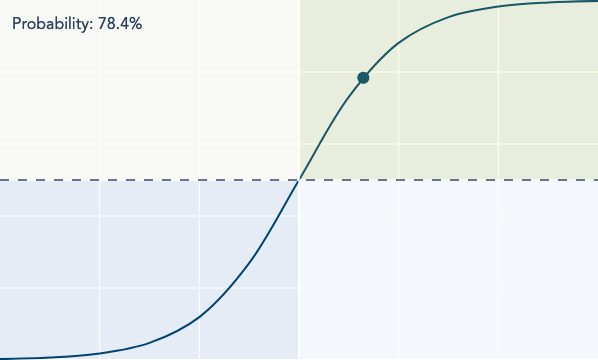

In [22]:
prediction.plot_confidence(call_display=False).update_layout(
    title_x   = 0.02
    , title_y = 0.95
    , title   = dict(
        font=dict(size=16)
    )
)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_bin_tab, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_bin_tab_fold = tests.tf_bin_tab.make_queue(fold_count=3)

In [ ]:
tf_bin_tab_fold.run_jobs()

In [ ]:
prediction = tests.infer(tf_bin_tab_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_bin_tab_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_multi_tab = tests.tf_multi_tab.make_queue()

In [ ]:
tf_multi_tab.run_jobs()

In [ ]:
prediction = tests.infer(tf_multi_tab)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_multi_tab, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_multi_tab_fold = tests.tf_multi_tab.make_queue(fold_count=3)

In [ ]:
tf_multi_tab_fold.run_jobs()

In [ ]:
prediction = tests.infer(tf_multi_tab_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_multi_tab_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_reg_tab = tests.tf_reg_tab.make_queue()

In [ ]:
tf_reg_tab.run_jobs()

In [ ]:
prediction = tests.infer(tf_reg_tab)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_reg_tab, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_reg_tab_fold = tests.tf_reg_tab.make_queue(fold_count=3)

In [ ]:
tf_reg_tab_fold.run_jobs()

In [ ]:
prediction = tests.infer(tf_reg_tab_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_reg_tab_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_bin_seq = tests.tf_bin_seq.make_queue()

In [ ]:
tf_bin_seq.run_jobs()

In [ ]:
prediction = tests.infer(tf_bin_seq)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_bin_seq, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_bin_seq_fold = tests.tf_bin_seq.make_queue(fold_count=3)

In [ ]:
tf_bin_seq_fold.run_jobs()

In [ ]:
prediction = tests.infer(tf_bin_seq_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_bin_seq_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_bin_img = tests.tf_bin_img.make_queue()

In [ ]:
tf_bin_img.run_jobs()

In [ ]:
prediction = tests.infer(tf_bin_img)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_bin_img, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_bin_img_fold = tests.tf_bin_img.make_queue(fold_count=3)

In [ ]:
tf_bin_img_fold.run_jobs()

In [ ]:
prediction = tests.infer(tf_bin_img_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_bin_img_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_fore_tab = tests.tf_fore_tab.make_queue()

In [ ]:
tf_fore_tab.run_jobs()

In [ ]:
prediction = tests.infer(tf_fore_tab, include_label=False)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(tf_fore_tab, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_fore_tab_fold = tests.tf_fore_tab.make_queue(fold_count=3)

In [ ]:
tf_fore_tab_fold.run_jobs()

In [ ]:
prediction = tests.infer(tf_fore_tab_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_fore_img = tests.tf_fore_img.make_queue()

In [ ]:
tf_fore_img.run_jobs()

In [ ]:
prediction = tests.infer(tf_fore_img, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
tf_fore_img_fold = tests.tf_fore_img.make_queue(fold_count=3)

In [ ]:
tf_fore_img_fold.run_jobs()

In [ ]:
prediction = tests.infer(tf_fore_img_fold, include_label=False)

In [ ]:
prediction.predictions

---

# PyTorch

In [ ]:
torch_multi_tab = tests.torch_multi_tab.make_queue()

In [ ]:
torch_multi_tab.run_jobs()

In [ ]:
prediction = tests.infer(torch_multi_tab)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_multi_tab, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_multi_tab_fold = tests.torch_multi_tab.make_queue(fold_count=3)

In [ ]:
torch_multi_tab_fold.run_jobs()

In [ ]:
prediction = tests.infer(torch_multi_tab_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_multi_tab_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_reg_tab = tests.torch_reg_tab.make_queue()

In [ ]:
torch_reg_tab.run_jobs()

In [ ]:
prediction = tests.infer(torch_reg_tab)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_reg_tab, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_reg_tab_fold = tests.torch_reg_tab.make_queue(fold_count=3)

In [ ]:
torch_reg_tab_fold.run_jobs()

In [ ]:
prediction = tests.infer(torch_reg_tab_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_reg_tab_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_bin_tab = tests.torch_bin_tab.make_queue()

In [ ]:
torch_bin_tab.run_jobs()

In [ ]:
prediction = tests.infer(torch_bin_tab)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_bin_tab, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_bin_tab_fold = tests.torch_bin_tab.make_queue(fold_count=3)

In [ ]:
torch_bin_tab_fold.run_jobs()

In [ ]:
prediction = tests.infer(torch_bin_tab_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_bin_tab_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_bin_seq = tests.torch_bin_seq.make_queue()

In [ ]:
torch_bin_seq.run_jobs()

In [ ]:
prediction = tests.infer(torch_bin_seq)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_bin_seq, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_bin_seq_fold = tests.torch_bin_seq.make_queue(fold_count=3)

In [ ]:
torch_bin_seq_fold.run_jobs()

In [ ]:
prediction = tests.infer(torch_bin_seq_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_bin_seq_fold, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_bin_img = tests.torch_bin_img.make_queue()

In [ ]:
torch_bin_img.run_jobs()

In [ ]:
prediction = tests.infer(torch_bin_img)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_bin_img, include_label=False)

In [ ]:
prediction.predictions

---

In [ ]:
torch_bin_img_fold = tests.torch_bin_img.make_queue(fold_count=3)

In [ ]:
torch_bin_img_fold.run_jobs()

In [ ]:
prediction = tests.infer(torch_bin_img_fold)

In [ ]:
prediction.metrics

In [ ]:
prediction.predictions

In [ ]:
prediction = tests.infer(torch_bin_img_fold, include_label=False)

In [ ]:
prediction.predictions

---